<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-data" data-toc-modified-id="Loading-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading data</a></span></li><li><span><a href="#Columns" data-toc-modified-id="Columns-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Columns</a></span></li><li><span><a href="#NaNs" data-toc-modified-id="NaNs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>NaNs</a></span><ul class="toc-item"><li><span><a href="#Types" data-toc-modified-id="Types-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Types</a></span></li><li><span><a href="#Numerical-data" data-toc-modified-id="Numerical-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Numerical data</a></span><ul class="toc-item"><li><span><a href="#Outliers" data-toc-modified-id="Outliers-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Outliers</a></span></li></ul></li></ul></li><li><span><a href="#Save" data-toc-modified-id="Save-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Save</a></span></li></ul></div>

In [121]:
# Standard libraries
import pandas as pd
import numpy as np
import math

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Notebook
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Loading data

In [122]:
df = pd.read_csv('../../data/raw/temperature/GlobalTemperatures.csv')
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
df.tail()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [124]:
original_shape = df.shape
original_shape

(3192, 9)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
dt                                           3192 non-null object
LandAverageTemperature                       3180 non-null float64
LandAverageTemperatureUncertainty            3180 non-null float64
LandMaxTemperature                           1992 non-null float64
LandMaxTemperatureUncertainty                1992 non-null float64
LandMinTemperature                           1992 non-null float64
LandMinTemperatureUncertainty                1992 non-null float64
LandAndOceanAverageTemperature               1992 non-null float64
LandAndOceanAverageTemperatureUncertainty    1992 non-null float64
dtypes: float64(8), object(1)
memory usage: 224.5+ KB


In [126]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LandAverageTemperature,3180.0,8.374731,4.381310,-2.080,4.31200,8.6105,12.54825,19.021
LandAverageTemperatureUncertainty,3180.0,0.938468,1.096440,0.034,0.18675,0.3920,1.41925,7.880
LandMaxTemperature,1992.0,14.350601,4.309579,5.900,10.21200,14.7600,18.45150,21.320
LandMaxTemperatureUncertainty,1992.0,0.479782,0.583203,0.044,0.14200,0.2520,0.53900,4.373
LandMinTemperature,1992.0,2.743595,4.155835,-5.407,-1.33450,2.9495,6.77875,9.715
LandMinTemperatureUncertainty,1992.0,0.431849,0.445838,0.045,0.15500,0.2790,0.45825,3.498
LandAndOceanAverageTemperature,1992.0,15.212566,1.274093,12.475,14.04700,15.2510,16.39625,17.611
LandAndOceanAverageTemperatureUncertainty,1992.0,0.128532,0.073587,0.042,0.06300,0.1220,0.15100,0.457


There is no empty rows at the end of dataset, but there's NaNs in different temperature columns (except `LandAverageTemperature` that has only a few). The temperature `min` and `max` don't seem to have extreme values.
  
Columns with anomalies:  
- `dt`: categorical.

# Columns
Information from [Kaggle](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data#GlobalTemperatures.csv)
- `Date`: starts in 1750 for average land temperature and 1850 for max and min land temperatures and global ocean and land temperatures
- `LandAverageTemperature`: global average land temperature in celsius
- `LandAverageTemperatureUncertainty`: the 95% confidence interval around the average
- `LandMaxTemperature`: global average maximum land temperature in celsius
- `LandMaxTemperatureUncertainty`: the 95% confidence interval around the maximum land temperature
- `LandMinTemperature`: global average minimum land temperature in celsius
- `LandMinTemperatureUncertainty`: the 95% confidence interval around the minimum land temperature
- `LandAndOceanAverageTemperature`: global average land and ocean temperature in celsius
- `LandAndOceanAverageTemperatureUncertainty`: the 95% confidence interval around the global average land and ocean temperature

In [127]:
df.drop_duplicates(inplace=True)

We drop the columns with `Uncertainty` because we won't use them in this project.

In [128]:
# Before starting, we get rid of data we don't want or need for the analysis.
# df.head(2)

In [129]:
# Dropping columns with pattern in the name
to_drop = [col for col in df.columns if ('Uncertainty' in col)]
df.drop(to_drop, axis=1, inplace=True)

In [130]:
# Drop columns we don't want
# to_drop = ['P. Name', 'P. Name Kepler', 'P. Name KOI', 'S. Name', 'S. Name HD', 'S. Name HIP', 'S. Constellation', 'S. Type', 'P. Disc. Method', 'P. Disc. Year']
# df.drop(to_drop, axis=1, inplace=True)

Cleaning names and renaming columns:

In [131]:
# Cleaning column names
df.columns = [x.strip() for x in df.columns]

# Checking if there's columns we don't want
# df.columns

In [132]:
df.rename(columns={'dt': 'date', 'LandAverageTemperature':'land_average', 'LandMaxTemperature':'land_max',
       'LandMinTemperature':'land_min', 'LandAndOceanAverageTemperature':'land_ocean_average'}, inplace=True)
df.columns

Index(['date', 'land_average', 'land_max', 'land_min', 'land_ocean_average'], dtype='object')

In [133]:
# Replacing patterns
# df.columns = df.columns.str.replace(' ', '_').str.replace('.','').str.replace('p. ', 'p_').str.replace('s. ', 's_')
# df.columns

Plotting the temperature columns to see if there is any anomaly in the data. We group by year since it is very slow when plotting by day. To do that, we first need to process the `date` column from 'object' to 'datetime'.

In [134]:
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d')
df.dtypes

date                  datetime64[ns]
land_average                 float64
land_max                     float64
land_min                     float64
land_ocean_average           float64
dtype: object

Create new columns `day`, `month` and `year`.

In [135]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

Group by `year` column. Decided to group with the median since it affected less by outliers.

In [136]:
df_year = df.groupby('year').median().reset_index()
df_year.head()

,year,land_average,land_max,land_min,land_ocean_average,month,day
0,1750,8.4900,NaN,NaN,NaN,6.5,1.0
1,1751,7.6700,NaN,NaN,NaN,6.5,1.0
2,1752,6.5705,NaN,NaN,NaN,6.5,1.0
3,1753,8.6170,NaN,NaN,NaN,6.5,1.0
4,1754,10.3555,NaN,NaN,NaN,6.5,1.0


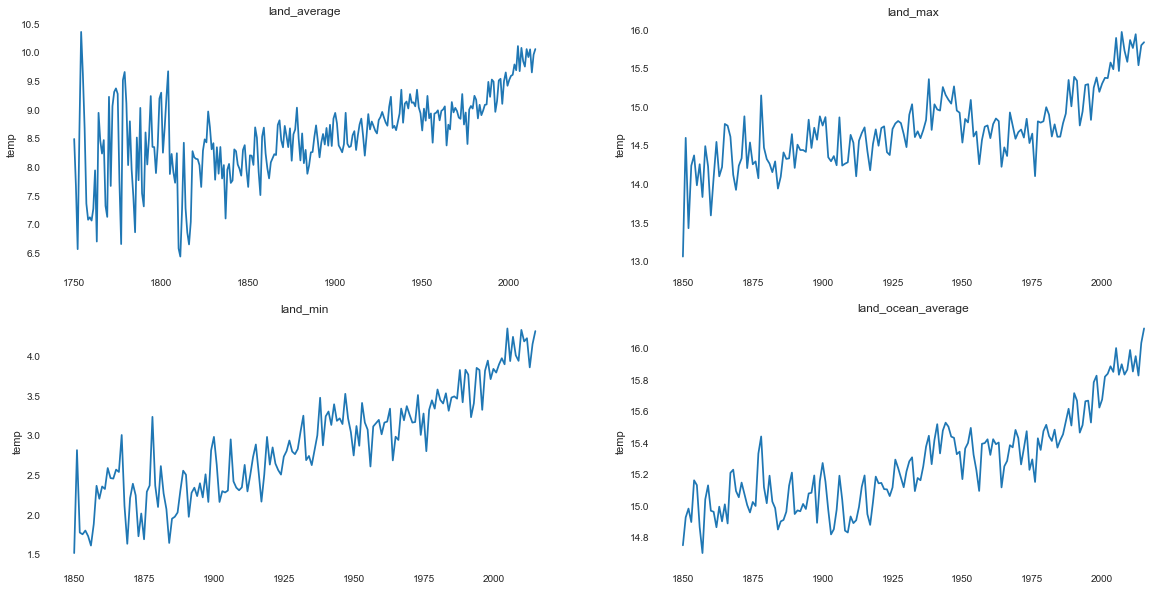

In [137]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
axs[0, 0].plot('year', 'land_average', data=df_year)
axs[0, 0].title.set_text('land_average')

axs[0, 1].plot('year', 'land_max',  data=df_year)
axs[0, 1].title.set_text('land_max')

axs[1, 0].plot('year', 'land_min',  data=df_year)
axs[1, 0].title.set_text('land_min')

axs[1, 1].plot('year', 'land_ocean_average', data=df_year)
axs[1, 1].title.set_text('land_ocean_average')

for ax in axs.flat:
    ax.set(ylabel='temp')
    
plt.show()

Keeping all the columns for now, but noticing that `land_average` is the only column that has data before 1850, but it has a very wide range during that period. After 1850, the variation decreases.

In [138]:
# fig, axs = plt.subplots(2, 1, figsize=(12,15))

# axs[0].plot('Year', 'Seasonally Adjusted CO2 (ppm)',  data=df)
# axs[0].title.set_text('Seasonally Adjusted CO2 (ppm)')

# axs[1].plot('Year', 'Seasonally Adjusted CO2 Fit (ppm)', data=df)
# axs[1].title.set_text('Seasonally Adjusted CO2 Fit (ppm)')

# for ax in axs.flat:
#     ax.set(ylabel='ppm')
    
# plt.show()

In [139]:
print(f'Original shape: {original_shape}')
print(f'New shape:      {df.shape}')

Original shape: (3192, 9)
New shape:      (3192, 8)


# NaNs

In [140]:
# Percentage of NaN values per column
print('\nPercentage of NaNs per column:')
nan_values = pd.DataFrame(((df.isnull().sum()) / df.shape[0]*100).sort_values(ascending=False))
display(nan_values[nan_values[0] > 0])


Percentage of NaNs per column:


,0
land_ocean_average,37.593985
land_min,37.593985
land_max,37.593985
land_average,0.375940


In [141]:
print('\nRows with NaNs, head and tail:')
display(df[df.isna().any(axis=1)].head())
display(df[df.isna().any(axis=1)].tail())


Rows with NaNs, head and tail:


,date,land_average,land_max,land_min,land_ocean_average,year,month,day
0,1750-01-01,3.034,NaN,NaN,NaN,1750,1,1
1,1750-02-01,3.083,NaN,NaN,NaN,1750,2,1
2,1750-03-01,5.626,NaN,NaN,NaN,1750,3,1
3,1750-04-01,8.490,NaN,NaN,NaN,1750,4,1
4,1750-05-01,11.573,NaN,NaN,NaN,1750,5,1


,date,land_average,land_max,land_min,land_ocean_average,year,month,day
1195,1849-08-01,13.603,NaN,NaN,NaN,1849,8,1
1196,1849-09-01,11.093,NaN,NaN,NaN,1849,9,1
1197,1849-10-01,8.890,NaN,NaN,NaN,1849,10,1
1198,1849-11-01,5.778,NaN,NaN,NaN,1849,11,1
1199,1849-12-01,1.923,NaN,NaN,NaN,1849,12,1


We see that the Nans are in the beginning of the dataset, previous to 1850. Since we already noticed in the earlier plots that the data during that period seems to have a large range and not be as reliable as the data that comes after 1850, we decide to delete these rows and focus on data after 1850. 

In [142]:
# Dropping columns with Nans over X %
# df = df.loc[:, df.isnull().sum() < 0.3 * df.shape[0]]

In [143]:
df.dropna(inplace=True)

In [144]:
df.reset_index(drop=True, inplace=True)

In [145]:
# plt.figure(figsize=(10,7))
# sns.heatmap(df.isnull(), cbar=False, cmap='viridis');

In [146]:
# Dropping columns where all values are Nan
# df.dropna(axis=1, how='all', inplace=True)

In [147]:
# df.dropna(inplace=True)

In [148]:
print(f'Original shape: {original_shape}')
print(f'New shape:      {df.shape}')

Original shape: (3192, 9)
New shape:      (1992, 8)


We've lost quite a lot of rows but the data didn't seem reliable, and having daily data since 1850 it is good enough.

## Types

In [149]:
# df.dtypes

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 8 columns):
date                  1992 non-null datetime64[ns]
land_average          1992 non-null float64
land_max              1992 non-null float64
land_min              1992 non-null float64
land_ocean_average    1992 non-null float64
year                  1992 non-null int64
month                 1992 non-null int64
day                   1992 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 124.6 KB


## Numerical data

In [152]:
df_numeric = df.select_dtypes(exclude=['object', 'datetime64'])
df_numeric.head()

,land_average,land_max,land_min,land_ocean_average,year,month,day
0,0.749,8.242,-3.206,12.833,1850,1,1
1,3.071,9.970,-2.291,13.588,1850,2,1
2,4.954,10.347,-1.905,14.043,1850,3,1
3,7.217,12.934,1.018,14.667,1850,4,1
4,10.004,15.655,3.811,15.507,1850,5,1


### Outliers

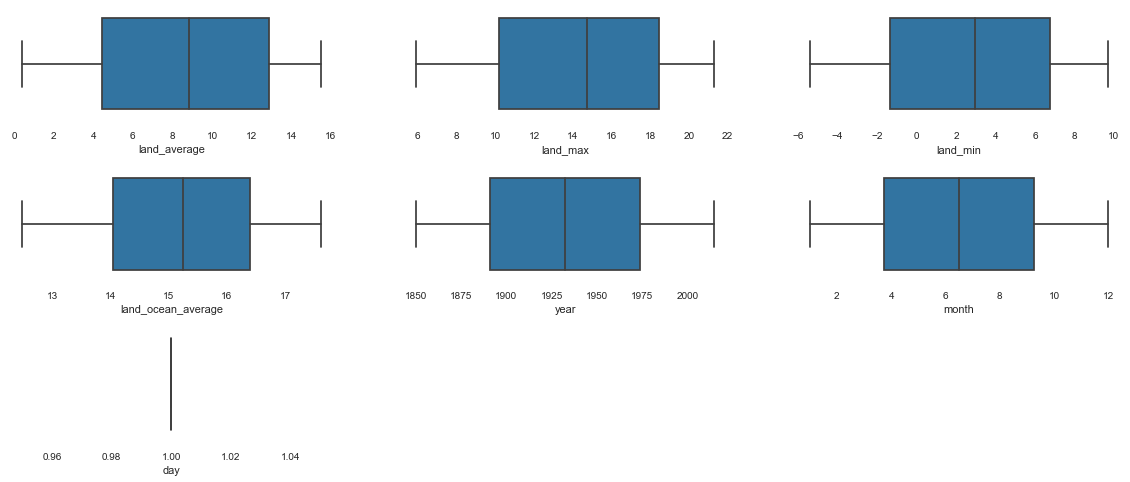

In [153]:
# Visualizing the outliers with boxplots
f = plt.figure(figsize=(20, 8))
i=1
import math
for col in df_numeric.columns:
    subplot = f.add_subplot(math.ceil(df_numeric.shape[1]/3),3,i)
    sns.boxplot(x=df_numeric[col].dropna(),whis=10)
    i=i+1
plt.subplots_adjust(hspace=0.4);

No outliers.

In [31]:
# Categorical data

In [155]:
# df.select_dtypes(include=['object']).head()

In [33]:
# df['p_sflux_mean_(eu)'] = df['p_sflux_mean_(eu)'].str.strip()
# df = df.replace('', np.nan)
# df['p_sflux_mean_(eu)'] = df['p_sflux_mean_(eu)'].astype('float64')

In [34]:
 # By column

# Save

In [156]:
df.to_csv('../../data/processed/temperature', index=False)